주성분 분석(Principal Component Analysis)  

차원(피쳐의 개수)을 줄이면서도 데이터가 퍼져있는 정도(분산)는 최대한 유지하게 만들어서 데이터를 저차원 데이터 축소하는 알고리즘을 말한다.  
주로 고차원 데이터를 3차원 이하의 데이터로 바꿔 시각화하는데  많이 사용되며 , 유용한 정보만 살려서 적은 메모리에 저장하거나 

In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

임의의 데이터셋을 만든다.  


In [5]:
datas= np.array([[5 * x, 5 * (np.sqrt(1 / 3) + 0.1 * np.random.normal(0, 1)) * x] for x in np.random.normal(0, 1, 30)])
print(datas)
print('=' * 80)
n_datas = datas - np.mean(datas,axis=0)
print(n_datas)

[[  1.04614968   0.59603473]
 [  4.76444895   2.72449884]
 [  7.8210536    4.22137794]
 [  2.81554124   1.42131979]
 [ -8.14448914  -6.40904792]
 [ -1.97296034  -1.36121241]
 [  4.37577941   2.71042967]
 [ -5.78344729  -2.93309221]
 [ -4.2350602   -2.41053759]
 [ -1.28616245  -0.67901869]
 [ -7.60927426  -6.24083579]
 [ -3.68794062  -1.89692454]
 [  0.4249549    0.21122891]
 [  1.45476964   0.73432436]
 [ -4.1182887   -2.01191713]
 [  0.35415426   0.2388349 ]
 [  0.33586895   0.24509212]
 [  1.58799688   0.76349509]
 [ -8.17629984  -5.6427905 ]
 [  0.83174941   0.45717864]
 [  9.53592168   5.80435561]
 [-11.3213877   -5.67162928]
 [  5.2244964    3.15847231]
 [  7.55964407   2.75606374]
 [ -0.77398755  -0.48501641]
 [  5.59323527   3.15059403]
 [ -0.19002748  -0.09017273]
 [  0.56614509   0.48579977]
 [ -3.3073609   -1.63623828]
 [ -0.61991977  -0.34527314]]
[[  1.27730624   0.86718827]
 [  4.99560551   2.99565238]
 [  8.05221017   4.49253148]
 [  3.0466978    1.69247333]
 [ -7.9133325

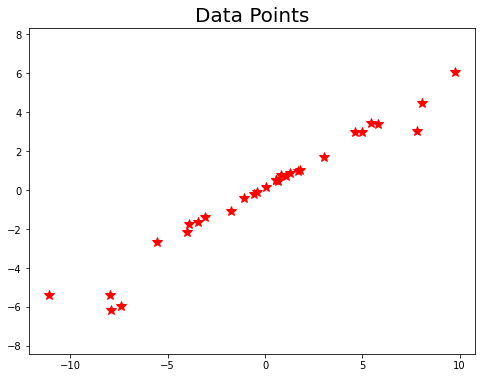

In [9]:
plt.figure(figsize=(8,6))
plt.title('Data Points' , fontsize=20)
plt.plot(n_datas[:,0],n_datas[:,1],'r*', markersize=10)
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다.
plt.show()

In [14]:
# 내적
A = np.array([[1,2],[3,4]])
print(A)
B = np.array([[1,-2],[2,3]])
print(B)
print(np.dot(A,B))
print(np.matmul(A,B))
print(A @ B) # np 에있는 내적연산자 

[[1 2]
 [3 4]]
[[ 1 -2]
 [ 2  3]]
[[ 5  4]
 [11  6]]
[[ 5  4]
 [11  6]]
[[ 5  4]
 [11  6]]


In [24]:
# 백터 내적
# np.array([1,0]) => 행만있으므로 행벡터이다.
print(np.dot(n_datas,np.array([1,0])))
print('=' * 80)
# np.array([1,0]).reshape(2,1) => 1행 2열이 2행 1열로 변환 => 1열만 있으므로 열 벡터이다 .
print(np.dot(n_datas,np.array([1,0]).reshape(2,1)))
print('=' * 80)
# np.array([[1],[0]]) => 2행 1열로 생성 => 1열만 있으므로 열 벡터 이다.
print(np.dot(n_datas,np.array([[1],[0]])))

[  1.27730624   4.99560551   8.05221017   3.0466978   -7.91333258
  -1.74180377   4.60693597  -5.55229073  -4.00390364  -1.05500589
  -7.3781177   -3.45678405   0.65611146   1.6859262   -3.88713214
   0.58531082   0.56702552   1.81915344  -7.94514328   1.06290597
   9.76707824 -11.09023114   5.45565296   7.79080063  -0.54283099
   5.82439183   0.04112908   0.79730165  -3.07620434  -0.38876321]
[[  1.27730624]
 [  4.99560551]
 [  8.05221017]
 [  3.0466978 ]
 [ -7.91333258]
 [ -1.74180377]
 [  4.60693597]
 [ -5.55229073]
 [ -4.00390364]
 [ -1.05500589]
 [ -7.3781177 ]
 [ -3.45678405]
 [  0.65611146]
 [  1.6859262 ]
 [ -3.88713214]
 [  0.58531082]
 [  0.56702552]
 [  1.81915344]
 [ -7.94514328]
 [  1.06290597]
 [  9.76707824]
 [-11.09023114]
 [  5.45565296]
 [  7.79080063]
 [ -0.54283099]
 [  5.82439183]
 [  0.04112908]
 [  0.79730165]
 [ -3.07620434]
 [ -0.38876321]]
[[  1.27730624]
 [  4.99560551]
 [  8.05221017]
 [  3.0466978 ]
 [ -7.91333258]
 [ -1.74180377]
 [  4.60693597]
 [ -5.5522

In [39]:
# x 축으로 사용하면 y좌표는 무시되고 x좌표만남게된다.
proj_xaxis = np.dot(n_datas, np.array([1,0]))
print(np.dot(n_datas, np.array([1,0])))
proj_xaxis2 = np.dot(proj_xaxis.reshape(-1,1),np.array([[1, 0]]))
print('=' * 80)
print(proj_xaxis2)

[  1.27730624   4.99560551   8.05221017   3.0466978   -7.91333258
  -1.74180377   4.60693597  -5.55229073  -4.00390364  -1.05500589
  -7.3781177   -3.45678405   0.65611146   1.6859262   -3.88713214
   0.58531082   0.56702552   1.81915344  -7.94514328   1.06290597
   9.76707824 -11.09023114   5.45565296   7.79080063  -0.54283099
   5.82439183   0.04112908   0.79730165  -3.07620434  -0.38876321]
[[  1.27730624   0.        ]
 [  4.99560551   0.        ]
 [  8.05221017   0.        ]
 [  3.0466978    0.        ]
 [ -7.91333258   0.        ]
 [ -1.74180377   0.        ]
 [  4.60693597   0.        ]
 [ -5.55229073   0.        ]
 [ -4.00390364   0.        ]
 [ -1.05500589   0.        ]
 [ -7.3781177    0.        ]
 [ -3.45678405   0.        ]
 [  0.65611146   0.        ]
 [  1.6859262    0.        ]
 [ -3.88713214   0.        ]
 [  0.58531082   0.        ]
 [  0.56702552   0.        ]
 [  1.81915344   0.        ]
 [ -7.94514328   0.        ]
 [  1.06290597   0.        ]
 [  9.76707824   0.    

In [33]:
# reshape(-1, n): 열의 개수는 n개로 고정하고 행은 상황에 따라 적절히 만든다.
print(proj_xaxis.reshape(-1,3)) # proj_xaxis.reshape(30,1)와 같은 표현이다.

[[  1.27730624   4.99560551   8.05221017]
 [  3.0466978   -7.91333258  -1.74180377]
 [  4.60693597  -5.55229073  -4.00390364]
 [ -1.05500589  -7.3781177   -3.45678405]
 [  0.65611146   1.6859262   -3.88713214]
 [  0.58531082   0.56702552   1.81915344]
 [ -7.94514328   1.06290597   9.76707824]
 [-11.09023114   5.45565296   7.79080063]
 [ -0.54283099   5.82439183   0.04112908]
 [  0.79730165  -3.07620434  -0.38876321]]


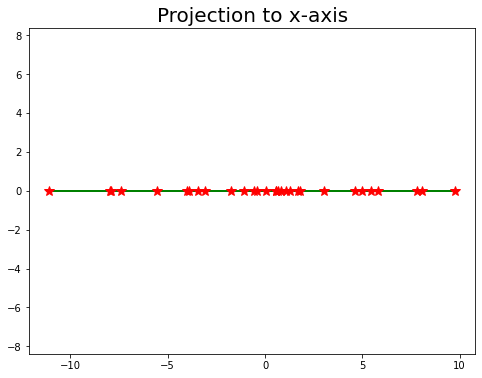

In [41]:
plt.figure(figsize=(8,6))
plt.title('Projection to x-axis' , fontsize=20)
plt.plot(proj_xaxis2[:,0], proj_xaxis2[:,1],'g-')
plt.plot(proj_xaxis2[:,0], proj_xaxis2[:,1],'r*', markersize=10)
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다.
plt.show()

In [46]:
proj_line = np.dot(n_datas, np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
print(n_datas, np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
print('=' * 80)
proj_line2 = np.dot(proj_line.reshape(-1, 1), np.array([[np.cos(np.pi / 6), np.sin(np.pi / 6)]]))
print(proj_line.reshape(-1, 1), np.array([[np.cos(np.pi / 6), np.sin(np.pi / 6)]]))
print('=' * 80)
print(proj_line2)

[[  1.27730624   0.86718827]
 [  4.99560551   2.99565238]
 [  8.05221017   4.49253148]
 [  3.0466978    1.69247333]
 [ -7.91333258  -6.13789438]
 [ -1.74180377  -1.09005887]
 [  4.60693597   2.98158321]
 [ -5.55229073  -2.66193867]
 [ -4.00390364  -2.13938405]
 [ -1.05500589  -0.40786515]
 [ -7.3781177   -5.96968225]
 [ -3.45678405  -1.625771  ]
 [  0.65611146   0.48238245]
 [  1.6859262    1.0054779 ]
 [ -3.88713214  -1.74076359]
 [  0.58531082   0.50998844]
 [  0.56702552   0.51624566]
 [  1.81915344   1.03464863]
 [ -7.94514328  -5.37163696]
 [  1.06290597   0.72833218]
 [  9.76707824   6.07550915]
 [-11.09023114  -5.40047574]
 [  5.45565296   3.42962585]
 [  7.79080063   3.02721728]
 [ -0.54283099  -0.21386287]
 [  5.82439183   3.42174757]
 [  0.04112908   0.18098081]
 [  0.79730165   0.75695331]
 [ -3.07620434  -1.36508474]
 [ -0.38876321  -0.0741196 ]] [0.8660254 0.5      ]
[[  1.53977378]
 [  5.82414747]
 [  9.2196843 ]
 [  3.48475435]
 [ -9.92209423]
 [ -2.05347575]
 [  5.48051

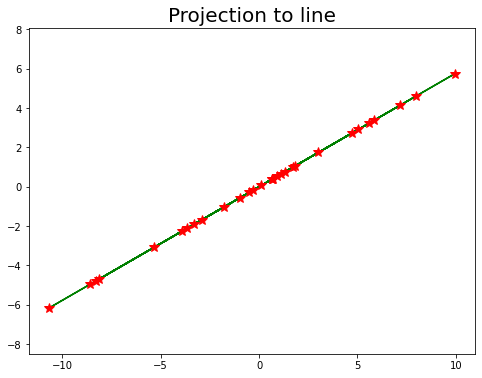

In [53]:
plt.figure(figsize=(8,6))
plt.title('Projection to line', fontsize=20)
plt.plot(proj_line2[:,0], proj_line2[:,1],'g-')
plt.plot(proj_line2[:,0], proj_line2[:,1],'r*', markersize=10)
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 주로 파이 그래프 그릴 때 사용
plt.show()

In [52]:
# 표준 편차가 큰게 데이터 과학 입장에서는 데이터의 분포를 잘 보존하고 있다고 생각할 수 있다 . 
print(np.std(proj_xaxis)) # x축 
print(np.std(proj_line)) # 임의로 설정한 선
# 임의로 설정한 선의 표준편차가 큼으로  x축 보다는 임의의 선으로 정사형 하는것이 좋다 .

4.972844430800925
5.776156408473635


공분산(Covariance)  

두 집단의 상호 연관성(상관 관계)을 측정하는 도구로 X에서 X의 기대값(평균)을 뺀 편차에서 Y에서 Y의 기대값을 뺀 편차의 곱에 대한 기대값으로 계산한다.

$$E((X - E(X))(Y - E(Y)))$$

$x = \{x_1, x_2, \ldots, x_n\}$ 이고 $y = \{y_1, y_2, \ldots, y_n\}$ 일 때 $x$와 $y$의 공분산은 아래와 같이 계산한다.

$$\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y) $$  

$n-1$ 로 계산하는 이유는 표본에 대한 분산이기 때문에 모집단에 대해서 공분산을 계산할 때는 $n$으로 계산한다.  

$Z = \begin{bmatrix} x_1 & x_2 & \cdots x_n \\ y_1 & y_2 & \cdots y_n \end{bmatrix}$ 이고  $\mu_x = \mu_y=0$일 경우 공분산 행렬은 $\Sigma =\begin{bmatrix} {\rm Var}(x) & {\rm Cov}(x,y) \\ {\rm Cov}(y,x) & {\rm Var}(y) \end{bmatrix}$와 같이 계산할 수 있고 $ ZZ^T = \begin{bmatrix} \langle x, x\rangle  &\langle x, y \rangle \\ \langle y, x \rangle &\langle y, y \rangle \end{bmatrix}$와 비례한다.

In [60]:
print((n_datas.T @ n_datas) / 29)
# ddof(delta degrees of freedom, 자유도)는 ddof =0 dlaus N으로 나누는 것이고 , ddof=1이면(N-1)로 나누는 것이다.
print(np.var(n_datas[:,0],ddof=1))
print(np.cov(n_datas.T,ddof=1))

[[25.58191214 15.04026277]
 [15.04026277  9.21112512]]
25.58191213753218
[[25.58191214 15.04026277]
 [15.04026277  9.21112512]]


PCA 예제1

In [64]:
sigma = n_datas.T @ n_datas # 공분산 행렬
# linalg.eig() 메소드는 공분산 행렬을 인수로 넘겨받아 고유값과 고유 벡터로 이루어진 행렬을 계산해 리턴한다.
las, evs = np.linalg.eig(sigma)
print(las) # 고유값, 피쳐가 2개이기 때문에 고유값이 2개가 나온다
# 고유 벡터 행렬의 첫 번째 열 벡터가 첫 번째 고유값에  두번째 열 벡터가 두번째 고유값에 대응된다.
# 원래 특성의 x값에 열 벡터의 첫 번째 값을 곱하고 y값에 열 벡터의 두번째 값을 곱한 특성을 새로운 특성으로 사용하면 
# 데이터의 분포를 거의 유지하면서 1차원으로 데이터를 나타낼수 있다는 의미이다.
print(evs) # 고유 벡터 행렬

[1001.07708436    7.92099608]
[[ 0.85965818 -0.51086966]
 [ 0.51086966  0.85965818]]


In [67]:
u1 = evs[:, 0] # 첫 번째 특성 벡터
print(u1)
print('='* 80)
proj_u1 = np.dot(n_datas, u1) # 원래 데이터와 첫 번째 특성 벡터 내적
print(proj_u1)

[0.85965818 0.51086966]
[  1.54106693   5.82490107   9.21724638   3.48375196  -9.93842512
  -2.05423387   5.48359061  -6.13297586  -4.53493493  -1.11531037
  -9.3923888   -3.80220977   0.81046614   1.96298841  -4.23090826
   0.76370486   0.75118237   2.09242073  -9.57431378   1.28581863
  11.50014202 -12.29274715   6.4420885    8.24393897  -0.57590515
   6.75505311   0.12781455   1.07211137  -3.34186461  -0.37206893]


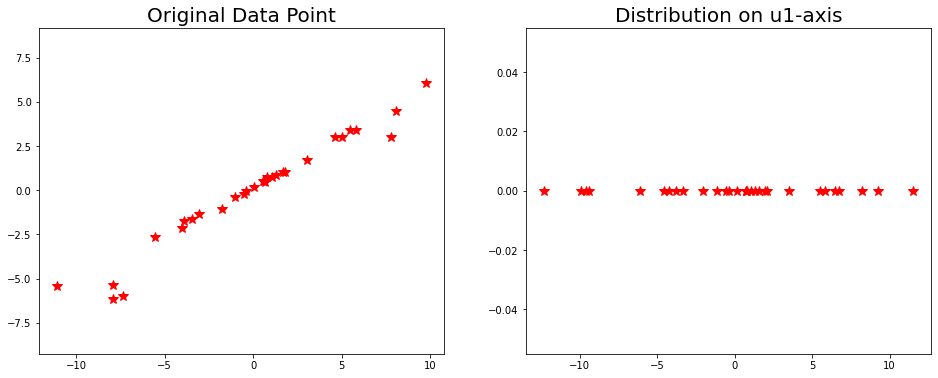

In [70]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Original Data Point', fontsize=20)
plt.plot(n_datas[:,0], n_datas[:,1],'r*', markersize=10) # 원래 데이터
plt.axis('equal')

plt.subplot(1,2,2)
plt.title('Distribution on u1-axis', fontsize=20)
plt.plot(proj_u1, np.zeros_like(proj_u1), 'r*' , markersize=10)

plt.show()

In [71]:
# 임의로 만든 선에 사영한 것 보다 고유 벡터를 사용해서 사영한 것의 분산이 조금 더 큰 것을 볼 수 있다.
print(np.std(proj_line))
print(np.std(proj_u1))

5.776156408473635
5.776611129843888


PCA 예제2

In [74]:
from sklearn.datasets import load_digits
#digits =load_digits()
digits.data.shape

(1797, 64)

In [78]:
data_ex = digits.data[0]
data_ex

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

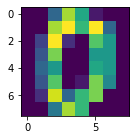

target value: 0


In [79]:
data_ex = data_ex.reshape(8,8)
plt.figure(figsize=(2,2))
plt.imshow(data_ex)
plt.show()
print('target value: {}'.format(digits.target[0]))

In [92]:
X = digits.data.copy()
X = X.T # 행렬을 전치하여 각 특징 벡터를 열 벡터로 만든다.
X = X - np.mean(X, axis=1).reshape(-1,1) # 브로드캐스팅을 이용해 평균이 0이 되도록해서 중심을 맞춘다.
sigma = np.dot(X, X.T) # 공분상 행렬
las, evs = np.linalg.eig(sigma) # 고유값과 고유 벡터를 계산한다.
# 고유값이 클 수록 더 많은 특성을 설명할 수 있는 피쳐이다.
print(las[:6])
# 처음 고유값 2개를 더한 값이 전체 고유값의 합 중에서 25.8%를 차지하므로 피쳐를 2개만 사용하더라도 전체 데이터의 
# 분산을 25.8%를 보존하고 있음을 알 수 있다.
print(sum(las[:2]) / sum(las))

[321496.44645596 294037.07339949 254652.03660974 181576.27386432
 124845.64540141 106158.91069579]
0.285093648236993


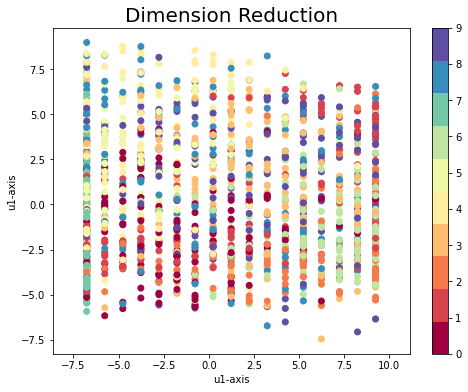

In [100]:
first_components = np.dot(evs[0],X)
second_components = np.dot(evs[1],X)

plt.figure(figsize=(8,6))
plt.title('Dimension Reduction', fontsize=20)
plt.scatter(first_components, second_components, c = digits.target , cmap = plt.cm.get_cmap('Spectral',10))
plt.xlabel('u1-axis')
plt.ylabel('u1-axis')
plt.axis('equal')
plt.colorbar()
plt.show()